In [29]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# Validation, regularisation and callbacks

 ## Coding tutorials
 #### [1. Validation sets](#coding_tutorial_1)
 #### [2. Model regularisation](#coding_tutorial_2)
 #### [3. Introduction to callbacks](#coding_tutorial_3)
 #### [4. Early stopping / patience](#coding_tutorial_4)

***
<a id="coding_tutorial_1"></a>
## Validation sets

#### Load the data

In [2]:
# Load the diabetes dataset
from sklearn.datasets import load_diabetes

diabetes_dataset=load_diabetes()
print(diabetes_dataset['DESCR'])


.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Brad

In [3]:
# Save the input and target variables
#print(diabetes_dataset.keys())

data=diabetes_dataset['data']
targets=diabetes_dataset['target']


In [7]:
# Normalise the target data (this will make clearer training curves)
targets=(targets-targets.mean(axis=0))/targets.std()
targets



array([-1.47194752e-02, -1.00165882e+00, -1.44579915e-01,  6.99512942e-01,
       -2.22496178e-01, -7.15965848e-01, -1.83538046e-01, -1.15749134e+00,
       -5.47147277e-01,  2.05006151e+00, -6.64021672e-01, -1.07957508e+00,
        3.48889755e-01,  4.26806019e-01, -4.43258925e-01,  2.45001404e-01,
        1.80071184e-01, -1.05621783e-01, -7.15965848e-01,  2.06043272e-01,
       -1.09256112e+00, -1.33929596e+00, -1.09256112e+00,  1.20596866e+00,
        4.13819975e-01,  6.47568766e-01, -1.96524090e-01, -8.71798376e-01,
       -2.74440354e-01,  1.69943833e+00, -3.00412442e-01, -1.20943552e+00,
        2.45262887e+00, -8.45826288e-01, -1.13151925e+00, -6.51035629e-01,
        1.46568953e+00,  1.60853602e+00,  1.29687096e+00, -8.06868156e-01,
       -6.77007716e-01, -1.26137969e+00, -1.18346343e+00, -7.80896068e-01,
        1.38777327e+00, -1.28735178e+00,  4.91736239e-01, -1.31593871e-01,
       -1.00165882e+00, -1.31593871e-01,  3.72247006e-02,  9.46247777e-01,
       -1.20943552e+00, -

In [8]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split

train_data, test_data, train_targets, test_targets=train_test_split(data,targets,test_size=0.1)
print(train_data.shape)


(397, 10)


#### Train a feedforward neural network model

In [9]:
# Build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def get_model():
    model=Sequential([
        Dense(128,activation='relu',input_shape=(train_data.shape[1],)),
        Dense(128,activation='relu'),
        Dense(128,activation='relu'),
        Dense(128,activation='relu'),
        Dense(128,activation='relu'),
        Dense(128,activation='relu'),
        Dense(1)
    ])
    return model

model=get_model()


In [10]:
# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1408      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1

In [11]:
# Compile the model
model.compile(optimizer='adam',loss='mse',metrics=['mae'])


In [12]:
# Train the model, with some of the data reserved for validation
history=model.fit(train_data,train_targets,epochs=100,validation_split=0.15,batch_size=64)


Train on 337 samples, validate on 60 samples
Epoch 1/100
337/337 [==============================] - 1s 4ms/sample - loss: 0.9758 - mae: 0.8483 - val_loss: 0.9426 - val_mae: 0.8232
Epoch 2/100
337/337 [==============================] - 0s 517us/sample - loss: 0.8665 - mae: 0.8005 - val_loss: 0.7593 - val_mae: 0.7159
Epoch 3/100
337/337 [==============================] - 0s 325us/sample - loss: 0.6332 - mae: 0.6814 - val_loss: 0.5563 - val_mae: 0.5851
Epoch 4/100
337/337 [==============================] - 0s 336us/sample - loss: 0.5435 - mae: 0.5929 - val_loss: 0.7642 - val_mae: 0.6544
Epoch 5/100
337/337 [==============================] - 0s 578us/sample - loss: 0.5096 - mae: 0.5732 - val_loss: 0.5614 - val_mae: 0.6007
Epoch 6/100
337/337 [==============================] - 0s 314us/sample - loss: 0.5021 - mae: 0.5796 - val_loss: 0.6023 - val_mae: 0.6009
Epoch 7/100
337/337 [==============================] - 0s 580us/sample - loss: 0.4465 - mae: 0.5458 - val_loss: 0.5483 - val_mae: 0.573

In [14]:
# Evaluate the model on the test set
model.evaluate(test_data, test_targets,verbose=2)


45/1 - 0s - loss: 0.7991 - mae: 0.6506


[0.7895174172189501, 0.6505798]

#### Plot the learning curves

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_2"></a>
## Model regularisation

#### Adding regularisation with weight decay and dropout

In [18]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [23]:
def get_regularised_model(wd, rate):
    model = Sequential([
        Dense(128, kernel_regularizer=regularizers.l2(wd),activation="relu", input_shape=(train_data.shape[1],)),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd),activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd),activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dense(1)
    ])
    return model

In [24]:
# Re-build the model with weight decay and dropout layers
model=get_regularised_model(1e-5,0.3)


In [25]:
# Compile the model
model.compile(optimizer='adam',loss='mse',metrics=['mae'])


In [ ]:
# Train the model, with some of the data reserved for validation
history=model.fit(train_data, train_targets, validation_split=0.15,epochs=100,
                 batch_size=64,verbose=False)


In [ ]:
# Evaluate the model on the test set
model.evaluate=


#### Plot the learning curves

In [ ]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_3"></a>
## Introduction to callbacks

#### Example training callback

In [48]:
# Write a custom callback

from tensorflow.keras.callbacks import Callback

class TrainingCallback(Callback):
    
    def on_train_beigin(self,log=None):
        print("Starting training...")
    
    def on_epoch_begin(self,epoch,log=None):
        print(f"Starting epoch{epoch}")
    
    def on_train_batch_begin(self,batch,log=None):
        print(f"Training: Starting epoch{batch}")
        
    def on_train_batch_end(self,batch,log=None):
        print(f"Training: Finished epoch{batch}")
        
    def on_epoch_end(self,epoch,log=None):
        print(f"Finished epoch{epoch}")
        
    def on_train_end(self,log=None):
        print("Finished training")

In [49]:
# Re-build the model
model=get_regularised_model(1e-5,0.3)


In [50]:
# Compile the model
model.compile(optimizer='adam',loss='mse')


#### Train the model with the callback

In [51]:
# Train the model, with some of the data reserved for validation
model.fit(train_data, train_targets, epochs=3, batch_size=128,
         verbose=2,callbacks=[TrainingCallback()])


Train on 397 samples
Starting epoch0
Epoch 1/3
Training: Starting epoch0
Training: Finished epoch0
Training: Starting epoch1
Training: Finished epoch1
Training: Starting epoch2
Training: Finished epoch2
Training: Starting epoch3
Training: Finished epoch3
Finished epoch0
397/397 - 1s - loss: 1.0000
Starting epoch1
Epoch 2/3
Training: Starting epoch0
Training: Finished epoch0
Training: Starting epoch1
Training: Finished epoch1
Training: Starting epoch2
Training: Finished epoch2
Training: Starting epoch3
Training: Finished epoch3
Finished epoch1
397/397 - 0s - loss: 0.9936
Starting epoch2
Epoch 3/3
Training: Starting epoch0
Training: Finished epoch0
Training: Starting epoch1
Training: Finished epoch1
Training: Starting epoch2
Training: Finished epoch2
Training: Starting epoch3
Training: Finished epoch3
Finished epoch2
397/397 - 0s - loss: 0.9802
Finished training


In [ ]:
# Evaluate the model
model.evaluate(test_data, test_targets, verbose=2, callbacks=[TestCallback()])
#have to change the class function
#notice: theres no epoch def in TestCallback class function

In [ ]:
# Make predictions with the model
mode.predict(test_data,verbose=False, callbacks=[PredictionCallback()])
#have to change the class function as well


***
<a id="coding_tutorial_4"></a>
## Early stopping / patience

#### Re-train the models with early stopping

In [64]:
# Re-train the unregularised model
unregularised_model=get_model()
unregularised_model.compile(optimizer='adam',loss='mse')
unreg_history=unregularised_model.fit(train_data, train_targets, epochs=100,
                                     batch_size=64, validation_split=0.15,verbose=False,
                                      callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)])


In [65]:
# Evaluate the model on the test set
unregularised_model.evaluate(test_data, test_targets,verbose=2)


45/1 - 0s - loss: 0.5273


0.4971431255340576

In [66]:
# Re-train the regularised model
regularised_model=get_regularised_model(1e-8,0.2)
regularised_model.compile(optimizer='adam',loss='mse')
reg_history=regularised_model.fit(train_data, train_targets, epochs=100,
                                     batch_size=64, validation_split=0.15,verbose=False,
                                  callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)])



In [67]:
# Evaluate the model on the test set
regularised_model.evaluate(test_data, test_targets,verbose=2)


45/1 - 0s - loss: 0.5455


0.5213058458434211

#### Plot the learning curves

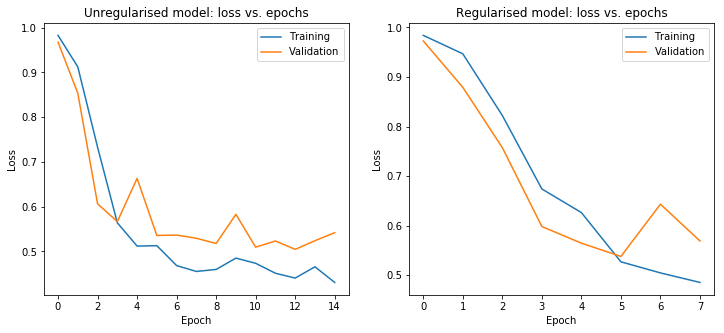

In [68]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))

fig.add_subplot(121)

plt.plot(unreg_history.history['loss'])
plt.plot(unreg_history.history['val_loss'])
plt.title('Unregularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig.add_subplot(122)

plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Regularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.show()